In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.decomposition import PCA as sklearnPCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.datasets.samples_generator import make_blobs

from pandas.tools.plotting import parallel_coordinates

In [2]:
dataset = pd.read_csv('C:/Users/revanth/Desktop/yelp_dataset/businesses_train.csv',low_memory=False)  
dataset = dataset.drop(['business_id','categories','elevation','id'], axis=1)

dataset.head()
X = dataset.loc[:, dataset.columns !='rating'].values
y = dataset.loc[:,'rating'].values
y_norm = (y - y.min())*2/(y.max() - y.min())
y = np.round(y_norm)
np.median(y)

1.0

C:\Users\revanth\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


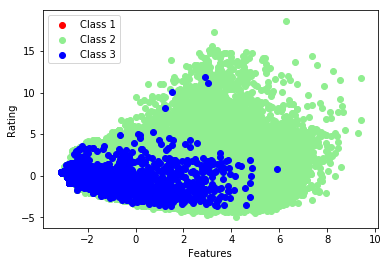

In [3]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scalar = StandardScaler()
X_norm = scalar.fit_transform(X)

pca = sklearnPCA(n_components=2) #2-dimensional PCA
transformed = pd.DataFrame(pca.fit_transform(X_norm))

plt.scatter(transformed[y==0][0], transformed[y==0][1], label='Class 1', c='red')
plt.scatter(transformed[y==1][0], transformed[y==1][1], label='Class 2', c='lightgreen')
plt.scatter(transformed[y==2][0], transformed[y==2][1], label='Class 3', c='blue')

plt.legend()
plt.xlabel('Features')
plt.ylabel('Rating')
plt.show()

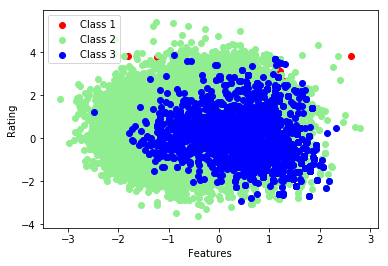

In [4]:
lda = LDA(n_components=2) #2-dimensional LDA
lda_transformed = pd.DataFrame(lda.fit_transform(X_norm,y))

# Plot all three series
plt.scatter(lda_transformed[y==0][0], lda_transformed[y==0][1], label='Class 1', c='red')
plt.scatter(lda_transformed[y==1][0], lda_transformed[y==1][1], label='Class 2', c='lightgreen')
plt.scatter(lda_transformed[y==2][0], lda_transformed[y==2][1], label='Class 3', c='blue')

# Display legend and show plot
plt.legend()
plt.xlabel('Features')
plt.ylabel('Rating')
plt.show()